In [1]:
import pandas as pd 
import os

In [2]:
master = pd.read_pickle(os.path.join("","HockeyDatabank","master.pickle"))
scoring = pd.read_pickle(os.path.join("","HockeyDatabank","scoring.pickle"))
teams = pd.read_pickle(os.path.join("","HockeyDatabank","team.pickle"))
teamsplits = pd.read_pickle(os.path.join("","HockeyDatabank","team_split.pickle"))

In [3]:
scoring.head()

firstName lastName pos   playerID  year tmID    GP    G     A   Pts    SOG
3     Antti    Aalto   C  aaltoan01  1997  ANA   3.0  0.0   0.0   0.0    1.0
4     Antti    Aalto   C  aaltoan01  1998  ANA  73.0  3.0   5.0   8.0   61.0
5     Antti    Aalto   C  aaltoan01  1999  ANA  63.0  7.0  11.0  18.0  102.0
6     Antti    Aalto   C  aaltoan01  2000  ANA  12.0  1.0   1.0   2.0   18.0
7   Spencer   Abbott   L  abbotsp01  2013  TOR   1.0  0.0   0.0   0.0    2.0

In [4]:
threeyears = scoring.loc[(scoring.year > 2000) & (scoring.year <2004)]

In [5]:
threeyears = threeyears.drop_duplicates(subset=["playerID","year"])

In [6]:
counts = threeyears["playerID"].value_counts()

In [10]:
# 3 random players
ds = counts[counts == 3].sample(3).index

In [11]:
df3 = threeyears.loc[threeyears["playerID"].isin(ids)]

In [12]:
basicdf3 = df3[["playerID","year","G"]]

In [13]:
basicdf3

playerID  year     G
7809   dunhami01  2001   0.0
7810   dunhami01  2002   0.0
7812   dunhami01  2003   0.0
7906   dwyergo01  2001   0.0
7907   dwyergo01  2002   0.0
7909   dwyergo01  2003   0.0
26251  renbemi01  2001  14.0
26252  renbemi01  2002  14.0
26253  renbemi01  2003  12.0

In [14]:
# move to long to wide format: PIVOT method
pivot = basicdf3.pivot(index="playerID",columns ="year", values="G")
pivot

year       2001  2002  2003
playerID                   
dunhami01   0.0   0.0   0.0
dwyergo01   0.0   0.0   0.0
renbemi01  14.0  14.0  12.0

In [15]:
pivot.index

Index(['dunhami01', 'dwyergo01', 'renbemi01'], dtype='object', name='playerID')

In [16]:
pivot.columns

Int64Index([2001, 2002, 2003], dtype='int64', name='year')

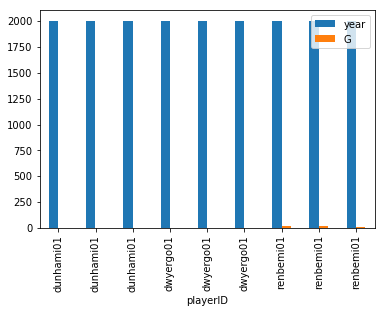

In [20]:
basicdf3.set_index("playerID").plot.bar();
# NOn ha molto senso questo plot bar

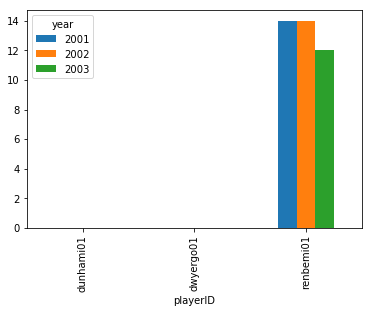

In [21]:
pivot.plot.bar();
# H a molto più senso questo plot bar

In [22]:
# move from wide to long
# before reset index
pivot = pivot.reset_index()
pivot.columns.name = None
pivot


playerID  2001  2002  2003
0  dunhami01   0.0   0.0   0.0
1  dwyergo01   0.0   0.0   0.0
2  renbemi01  14.0  14.0  12.0

In [24]:
pivot.melt()
# senza argomenti la melt non ha senso

variable      value
0   playerID  dunhami01
1   playerID  dwyergo01
2   playerID  renbemi01
3       2001          0
4       2001          0
5       2001         14
6       2002          0
7       2002          0
8       2002         14
9       2003          0
10      2003          0
11      2003         12

In [25]:
pivot.melt(id_vars="playerID")

playerID variable  value
0  dunhami01     2001    0.0
1  dwyergo01     2001    0.0
2  renbemi01     2001   14.0
3  dunhami01     2002    0.0
4  dwyergo01     2002    0.0
5  renbemi01     2002   14.0
6  dunhami01     2003    0.0
7  dwyergo01     2003    0.0
8  renbemi01     2003   12.0

In [26]:
pivot.melt(id_vars="playerID",var_name="year", value_name="goals")

playerID  year  goals
0  dunhami01  2001    0.0
1  dwyergo01  2001    0.0
2  renbemi01  2001   14.0
3  dunhami01  2002    0.0
4  dwyergo01  2002    0.0
5  renbemi01  2002   14.0
6  dunhami01  2003    0.0
7  dwyergo01  2003    0.0
8  renbemi01  2003   12.0

In [27]:
scoring.head()

firstName lastName pos   playerID  year tmID    GP    G     A   Pts    SOG
3     Antti    Aalto   C  aaltoan01  1997  ANA   3.0  0.0   0.0   0.0    1.0
4     Antti    Aalto   C  aaltoan01  1998  ANA  73.0  3.0   5.0   8.0   61.0
5     Antti    Aalto   C  aaltoan01  1999  ANA  63.0  7.0  11.0  18.0  102.0
6     Antti    Aalto   C  aaltoan01  2000  ANA  12.0  1.0   1.0   2.0   18.0
7   Spencer   Abbott   L  abbotsp01  2013  TOR   1.0  0.0   0.0   0.0    2.0

In [28]:
mi = scoring.set_index(['playerID', 'year'])
mi.head()

firstName lastName pos tmID    GP    G     A   Pts    SOG
playerID  year                                                          
aaltoan01 1997     Antti    Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0
          1998     Antti    Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0
          1999     Antti    Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0
          2000     Antti    Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0
abbotsp01 2013   Spencer   Abbott   L  TOR   1.0  0.0   0.0   0.0    2.0

In [29]:
mi.index

MultiIndex(levels=[['aaltoan01', 'abbotsp01', 'abdelju01', 'abergpo01', 'abidra01', 'abrahth01', 'acciano01', 'actonke01', 'actonwi01', 'adamlu01', 'adamru01', 'adamsbr01', 'adamscr01', 'adamsgr01', 'adamsgr02', 'adamske01', 'aebisda01', 'afanadm01', 'afflebr01', 'afinoma01', 'agnewji01', 'agostke01', 'agozzan01', 'aholape01', 'ahose01', 'ahose02', 'aitkebr01', 'aitkejo01', 'aittosa01', 'aivazmi01', 'akesoja01', 'alatami01', 'albelto01', 'alberan01', 'alberjo01', 'aldrike01', 'alexeni01', 'alfreda01', 'aliuak01', 'allenbo01', 'allenbr01', 'allench01', 'allenco01', 'allenja01', 'allenpe01', 'alleyst01', 'allisda01', 'allisja01', 'allisja02', 'allismi01', 'allisra01', 'almonco01', 'almqvad01', 'altma01', 'alvesjo01', 'alzneka01', 'amadimi01', 'ambrope01', 'amontto01', 'andercr01', 'anderer01', 'anderfr01', 'andergl01', 'anderjo01', 'anderjo02', 'anderjo04', 'anderjo05', 'anderke01', 'anderli01', 'anderma01', 'andermi01', 'anderni01', 'anderpe01', 'anderpe02', 'anderpe03', 'anderra01', 'a

In [30]:
mi.index.nlevels

2

In [32]:
mi.index.levels[0]

Index(['aaltoan01', 'abbotsp01', 'abdelju01', 'abergpo01', 'abidra01',
       'abrahth01', 'acciano01', 'actonke01', 'actonwi01', 'adamlu01',
       ...
       'zombori01', 'zubaran01', 'zubovil01', 'zubovse01', 'zubruda01',
       'zuccama01', 'zuckeja01', 'zukemi01', 'zykovva01', 'zyuzian01'],
      dtype='object', name='playerID', length=5513)

In [33]:
mi.index.levels[1]

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017],
           dtype='int64', name='year')

In [34]:
mi.groupby(level="year")['G'].max().head()

year
1980    68.0
1981    92.0
1982    71.0
1983    87.0
1984    73.0
Name: G, dtype: float64

In [35]:
mi.groupby(level="year")['G'].idxmax().head()

year
1980    (bossymi01, 1980)
1981    (gretzwa01, 1981)
1982    (gretzwa01, 1982)
1983    (gretzwa01, 1983)
1984    (gretzwa01, 1984)
Name: G, dtype: object

In [36]:
mi.loc[mi.groupby(level="year")['G'].idxmax()].head()

firstName lastName pos tmID    GP     G      A    Pts    SOG
playerID  year                                                             
bossymi01 1980      Mike    Bossy   R  NYI  79.0  68.0   51.0  119.0  315.0
gretzwa01 1981     Wayne  Gretzky   C  EDM  80.0  92.0  120.0  212.0  369.0
          1982     Wayne  Gretzky   C  EDM  80.0  71.0  125.0  196.0  348.0
          1983     Wayne  Gretzky   C  EDM  74.0  87.0  118.0  205.0  324.0
          1984     Wayne  Gretzky   C  EDM  80.0  73.0  135.0  208.0  358.0

In [37]:
idx = pd.IndexSlice
mi2 = mi.sort_index()

In [38]:
mi.index.is_lexsorted()

True

In [41]:
sliced = mi.loc[idx[:, 1997:2000], :]
sliced.head()

firstName lastName pos tmID    GP    G     A   Pts    SOG
playerID  year                                                          
aaltoan01 1997     Antti    Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0
          1998     Antti    Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0
          1999     Antti    Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0
          2000     Antti    Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0
adamsbr01 1999     Bryan    Adams   L  ATL   2.0  0.0   0.0   0.0    1.0

In [42]:
# per filtrare più valori ho bisogno del get_locs
locs = mi.index.get_locs((idx['aaltoan01':'adamscr01',1997:2000]))
locs

array([ 0,  1,  2,  3, 56, 57, 58])

In [43]:
sliced = mi.iloc[locs,:]
sliced.head()

firstName lastName pos tmID    GP    G     A   Pts    SOG
playerID  year                                                          
aaltoan01 1997     Antti    Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0
          1998     Antti    Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0
          1999     Antti    Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0
          2000     Antti    Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0
adamsbr01 1999     Bryan    Adams   L  ATL   2.0  0.0   0.0   0.0    1.0

In [44]:
import numpy as np

In [47]:
def get_many_locs(df,slices):
    arr = np.empty(0, dtype="int")
    for s in slices:
        locs = df.index.get_locs((s))
        arr = np.concatenate((arr,locs))
    return arr

In [48]:
locs = get_many_locs(mi, 
                    (
                        idx['aaltoan01':'adamscr01',1997:2000],
                        idx['aaltoan01':'adamscr01',2004:2006]
                    ))

In [49]:
sliced = mi.iloc[locs,:]
sliced.head(10)

firstName lastName pos tmID    GP     G     A   Pts    SOG
playerID  year                                                           
aaltoan01 1997     Antti    Aalto   C  ANA   3.0   0.0   0.0   0.0    1.0
          1998     Antti    Aalto   C  ANA  73.0   3.0   5.0   8.0   61.0
          1999     Antti    Aalto   C  ANA  63.0   7.0  11.0  18.0  102.0
          2000     Antti    Aalto   C  ANA  12.0   1.0   1.0   2.0   18.0
adamsbr01 1999     Bryan    Adams   L  ATL   2.0   0.0   0.0   0.0    1.0
          2000     Bryan    Adams   L  ATL   9.0   0.0   1.0   1.0    3.0
adamscr01 2000     Craig    Adams   R  CAR  44.0   1.0   0.0   1.0   15.0
abidra01  2005     Ramzi     Abid   L  ATL   6.0   0.0   2.0   2.0    6.0
          2006     Ramzi     Abid   L  NAS  13.0   1.0   4.0   5.0   12.0
adamscr01 2005     Craig    Adams   R  CAR  67.0  10.0  11.0  21.0   68.0

In [50]:
# Rivisitazione delle strutture Wide and Long
teamsplits.head(5)

year tmID  NovW  NovL  NovT  NovOL  DecW  DecL  DecT  DecOL  ...  FebOL  \
0  1980  BOS   5.0   3.0   5.0    NaN   6.0   6.0   1.0    NaN  ...    NaN   
1  1980  BUF   8.0   4.0   3.0    NaN   5.0   3.0   4.0    NaN  ...    NaN   
2  1980  CAL   5.0   5.0   3.0    NaN   6.0   3.0   3.0    NaN  ...    NaN   
3  1980  CHI   3.0   8.0   3.0    NaN   3.0   9.0   1.0    NaN  ...    NaN   
4  1980  COR   5.0   6.0   2.0    NaN   4.0   9.0   2.0    NaN  ...    NaN   

   MarW  MarL  MarT  MarOL  AprW  AprL  AprT  AprOL                 name  
0   8.0   4.0   3.0    NaN   1.0   2.0   0.0    NaN        Boston Bruins  
1   8.0   6.0   1.0    NaN   1.0   1.0   1.0    NaN       Buffalo Sabres  
2   6.0   6.0   2.0    NaN   2.0   0.0   0.0    NaN       Calgary Flames  
3   4.0   5.0   4.0    NaN   1.0   1.0   1.0    NaN  Chicago Black Hawks  
4   4.0   9.0   1.0    NaN   0.0   1.0   2.0    NaN     Colorado Rockies  

[5 rows x 27 columns]

In [51]:
teamsplits = teamsplits.drop(columns=["tmID"])
teamsplits = teamsplits.set_index(["year","name"])
teamsplits.head()

NovW  NovL  NovT  NovOL  DecW  DecL  DecT  DecOL  \
year name                                                                    
1980 Boston Bruins         5.0   3.0   5.0    NaN   6.0   6.0   1.0    NaN   
     Buffalo Sabres        8.0   4.0   3.0    NaN   5.0   3.0   4.0    NaN   
     Calgary Flames        5.0   5.0   3.0    NaN   6.0   3.0   3.0    NaN   
     Chicago Black Hawks   3.0   8.0   3.0    NaN   3.0   9.0   1.0    NaN   
     Colorado Rockies      5.0   6.0   2.0    NaN   4.0   9.0   2.0    NaN   

                          JanW  JanL  ...  FebT  FebOL  MarW  MarL  MarT  \
year name                             ...                                  
1980 Boston Bruins         9.0   4.0  ...   2.0    NaN   8.0   4.0   3.0   
     Buffalo Sabres        6.0   1.0  ...   3.0    NaN   8.0   6.0   1.0   
     Calgary Flames        6.0   7.0  ...   1.0    NaN   6.0   6.0   2.0   
     Chicago Black Hawks   9.0   3.0  ...   4.0    NaN   4.0   5.0   4.0   
     Colorado Rockies      3.0   8.0  ...   2.0    NaN   4.0   9.0   1.0   

                          MarOL  AprW  AprL  AprT  AprOL  
year name                                                 
1980 Boston Bruins          NaN   1.0   2.0   0.0    NaN  
     Buffalo Sabres         NaN   1.0   1.0   1.0    NaN  
     Calgary Flames         NaN   2.0   0.0   0.0    NaN  
     Chicago Black Hawks    NaN   1.0   1.0   1.0    NaN  
     Colorado Rockies       NaN   0.0   1.0   2.0    NaN  

[5 rows x 24 columns]

In [55]:
months = teamsplits.columns.map(lambda x:x[:3])
metrics = teamsplits.columns.map(lambda x:x[3:])
print(months)

Index(['Nov', 'Nov', 'Nov', 'Nov', 'Dec', 'Dec', 'Dec', 'Dec', 'Jan', 'Jan',
       'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Mar', 'Mar',
       'Apr', 'Apr', 'Apr', 'Apr'],
      dtype='object')


In [56]:
print(metrics)

Index(['W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L',
       'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL'],
      dtype='object')


In [57]:
midx = pd.MultiIndex.from_arrays([months,metrics])
midx

MultiIndex(levels=[['Apr', 'Dec', 'Feb', 'Jan', 'Mar', 'Nov'], ['L', 'OL', 'T', 'W']],
           codes=[[5, 5, 5, 5, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 0], [3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1]])

In [58]:
teamsplits.columns = midx
teamsplits.head()

Nov                Dec                Jan       ...  \
                            W    L    T  OL    W    L    T  OL    W    L  ...   
year name                                                                 ...   
1980 Boston Bruins        5.0  3.0  5.0 NaN  6.0  6.0  1.0 NaN  9.0  4.0  ...   
     Buffalo Sabres       8.0  4.0  3.0 NaN  5.0  3.0  4.0 NaN  6.0  1.0  ...   
     Calgary Flames       5.0  5.0  3.0 NaN  6.0  3.0  3.0 NaN  6.0  7.0  ...   
     Chicago Black Hawks  3.0  8.0  3.0 NaN  3.0  9.0  1.0 NaN  9.0  3.0  ...   
     Colorado Rockies     5.0  6.0  2.0 NaN  4.0  9.0  2.0 NaN  3.0  8.0  ...   

                          Feb      Mar                Apr                
                            T  OL    W    L    T  OL    W    L    T  OL  
year name                                                                
1980 Boston Bruins        2.0 NaN  8.0  4.0  3.0 NaN  1.0  2.0  0.0 NaN  
     Buffalo Sabres       3.0 NaN  8.0  6.0  1.0 NaN  1.0  1.0  1.0 NaN  
     Calgary Flames       1.0 NaN  6.0  6.0  2.0 NaN  2.0  0.0  0.0 NaN  
     Chicago Black Hawks  4.0 NaN  4.0  5.0  4.0 NaN  1.0  1.0  1.0 NaN  
     Colorado Rockies     2.0 NaN  4.0  9.0  1.0 NaN  0.0  1.0  2.0 NaN  

[5 rows x 24 columns]

In [59]:
teamsplits = teamsplits.stack(level=0)
teamsplits.head(10)

L  OL    T    W
year name                                 
1980 Boston Bruins  Apr  2.0 NaN  0.0  1.0
                    Dec  6.0 NaN  1.0  6.0
                    Feb  4.0 NaN  2.0  6.0
                    Jan  4.0 NaN  1.0  9.0
                    Mar  4.0 NaN  3.0  8.0
                    Nov  3.0 NaN  5.0  5.0
     Buffalo Sabres Apr  1.0 NaN  1.0  1.0
                    Dec  3.0 NaN  4.0  5.0
                    Feb  3.0 NaN  3.0  6.0
                    Jan  1.0 NaN  7.0  6.0

In [60]:
teamsplits = teamsplits.swaplevel(1,2)
teamsplits.head()

L  OL    T    W
year     name                            
1980 Apr Boston Bruins  2.0 NaN  0.0  1.0
     Dec Boston Bruins  6.0 NaN  1.0  6.0
     Feb Boston Bruins  4.0 NaN  2.0  6.0
     Jan Boston Bruins  4.0 NaN  1.0  9.0
     Mar Boston Bruins  4.0 NaN  3.0  8.0

In [61]:
teamsplits = teamsplits.reorder_levels([2,0,1])
teamsplits.head()

L  OL    T    W
name          year                       
Boston Bruins 1980 Apr  2.0 NaN  0.0  1.0
                   Dec  6.0 NaN  1.0  6.0
                   Feb  4.0 NaN  2.0  6.0
                   Jan  4.0 NaN  1.0  9.0
                   Mar  4.0 NaN  3.0  8.0

In [62]:
teamsplits.index.levels[2].name = "month"
teamsplits.head()

L  OL    T    W
name          year month                   
Boston Bruins 1980 Apr    2.0 NaN  0.0  1.0
                   Dec    6.0 NaN  1.0  6.0
                   Feb    4.0 NaN  2.0  6.0
                   Jan    4.0 NaN  1.0  9.0
                   Mar    4.0 NaN  3.0  8.0

In [63]:
teamsplits.groupby(level=["name","year"]).sum().head(10)

L    OL    T     W
name          year                       
Anaheim Ducks 2006  20.0  11.0  0.0  39.0
              2007  20.0   6.0  0.0  43.0
              2008  28.0   6.0  0.0  36.0
              2009  26.0   9.0  0.0  35.0
              2010  23.0   4.0  0.0  43.0
              2011  31.0  11.0  0.0  29.0
              2012  12.0   6.0  0.0  30.0
              2013  17.0   7.0  0.0  44.0
              2014  21.0   7.0  0.0  42.0
              2015  18.0   9.0  0.0  45.0

In [64]:
teamsplits.unstack(level=["year","month"]).head()

L                                               ...    W  \
year              1980                          1981                 ... 2016   
month              Apr  Dec  Feb  Jan  Mar  Nov  Apr  Dec  Feb  Jan  ...  Feb   
name                                                                 ...        
Anaheim Ducks      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  4.0   
Arizona Coyotes    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  6.0   
Atlanta Thrashers  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Boston Bruins      2.0  6.0  4.0  4.0  4.0  3.0  1.0  3.0  5.0  6.0  ...  7.0   
Buffalo Sabres     1.0  3.0  3.0  1.0  6.0  4.0  1.0  5.0  5.0  4.0  ...  6.0   

                                                                    
year                               2017                             
month               Jan   Mar  Nov  Apr   Dec  Feb  Jan   Mar  Nov  
name                                                                
Anaheim Ducks      10.0  10.0  8.0  4.0   7.0  6.0  7.0   9.0  5.0  
Arizona Coyotes     5.0   6.0  6.0  1.0   3.0  6.0  3.0  10.0  5.0  
Atlanta Thrashers   NaN   NaN  NaN  NaN   NaN  NaN  NaN   NaN  NaN  
Boston Bruins       6.0   8.0  8.0  1.0  10.0  9.0  8.0  11.0  7.0  
Buffalo Sabres      7.0   6.0  5.0  0.0   4.0  6.0  4.0   5.0  3.0  

[5 rows x 868 columns]

In [65]:
teamsplits.to_pickle(os.path.join("","HockeyDatabank","team_splits_mi.pickle"))
mi.to_pickle(os.path.join("","HockeyDatabank","scoring_mi.pickle"))